In [105]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [106]:
avocado = pd.read_csv('/content/avocado.csv')
avocado.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

# data analysis

In [107]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [108]:
avocado.duplicated().sum()

0

In [109]:
avocado.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [110]:
avocado.drop(columns=['Unnamed: 0', "4046" ,"4225" , "4770"], inplace=True)

In [111]:
avocado.Date= pd.to_datetime(avocado.Date)

In [112]:
avocado.columns = avocado.columns.str.lower()

In [113]:
avocado['month'] = avocado.date.dt.month
avocado['month_name'] = avocado.date.dt.month_name()
avocado['day'] = avocado.date.dt.day
avocado['day_name'] = avocado.date.dt.day_name()

In [114]:
index_to_drop = avocado[avocado['total bags'] == 0].index
avocado.drop(index_to_drop, inplace=True)

In [115]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18234 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          18234 non-null  datetime64[ns]
 1   averageprice  18234 non-null  float64       
 2   total volume  18234 non-null  float64       
 3   total bags    18234 non-null  float64       
 4   small bags    18234 non-null  float64       
 5   large bags    18234 non-null  float64       
 6   xlarge bags   18234 non-null  float64       
 7   type          18234 non-null  object        
 8   year          18234 non-null  int64         
 9   region        18234 non-null  object        
 10  month         18234 non-null  int32         
 11  month_name    18234 non-null  object        
 12  day           18234 non-null  int32         
 13  day_name      18234 non-null  object        
dtypes: datetime64[ns](1), float64(6), int32(2), int64(1), object(4)
memory usage: 1.9+ MB


In [161]:
avocado.to_csv('avocado_updated.csv', index=False)

In [116]:
avocado.describe()

date  averageprice  total volume  \
count                          18234  18234.000000  1.823400e+04   
mean   2016-08-14 07:54:18.835143168      1.405571  8.513303e+05   
min              2015-01-04 00:00:00      0.440000  8.456000e+01   
25%              2015-10-25 00:00:00      1.100000  1.085037e+04   
50%              2016-08-14 00:00:00      1.370000  1.077550e+05   
75%              2017-06-04 00:00:00      1.660000  4.335570e+05   
max              2018-03-25 00:00:00      3.250000  6.250565e+07   
std                              NaN      0.402423  3.454883e+06   

         total bags    small bags    large bags    xlarge bags          year  \
count  1.823400e+04  1.823400e+04  1.823400e+04   18234.000000  18234.000000   
mean   2.398363e+05  1.823446e+05  5.438279e+04    3108.981975   2016.148843   
min    3.090000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000   
25%    5.102392e+03  2.869698e+03  1.288300e+02       0.000000   2015.000000   
50%    3.981206e+04  2.642656e+04  2.655245e+03       0.000000   2016.000000   
75%    1.109385e+05  8.342576e+04  2.205331e+04     133.330000   2017.000000   
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000   
std    9.866240e+05  7.464671e+05  2.440613e+05   17699.946544      0.939748   

              month           day  
count  18234.000000  18234.000000  
mean       6.177361     15.662389  
min        1.000000      1.000000  
25%        3.000000      8.000000  
50%        6.000000     16.000000  
75%        9.000000     23.000000  
max       12.000000     31.000000  
std        3.535037      8.776354

In [117]:
avocado.describe(include='object')

type  region month_name day_name
count          18234   18234      18234    18234
unique             2      54         12        1
top     conventional  Albany    January   Sunday
freq            9126     338       1944    18234

# plotly

## Numerical data

- univariate
  - Histogram
  - distpolt

- Bivariate
  - scatter plot
  - scatter matrix
  - line


In [118]:
px.histogram(data_frame = avocado,x = 'averageprice', nbins=100 , color = 'type', color_discrete_sequence=['pink', 'blue'], marginal='box')

In [119]:
px.histogram(data_frame = avocado,x = 'total volume', nbins=50 , color = 'type', color_discrete_sequence=['red', 'orange'])

In [120]:
px.histogram(data_frame = avocado,x = 'total bags', nbins=10 , color = 'type', color_discrete_sequence=['pink', 'blue'])

In [121]:
px.histogram(data_frame = avocado,x = 'averageprice', nbins=100 , color = 'type', color_discrete_sequence=['pink', 'blue'],facet_col='month_name', width=5000, height=700 )

In [122]:
import plotly.figure_factory as ff
list_data =avocado.averageprice.to_list()
fig = ff.create_distplot([list_data],['averageprice'], show_rug=False , colors=['green'])
fig.update_xaxes(title_text='averageprice')
fig.update_yaxes(title_text='probability')
fig.update_layout(title_text='total_bill distribution')
fig.show()

In [123]:
px.pie(avocado , 'type')

In [124]:
px.pie(avocado , values = 'averageprice', names = 'type')

In [125]:
px.scatter(avocado,x='total volume',y='total bags',color='type')

In [126]:
px.scatter(avocado,x='total volume',y='total bags',size = 'averageprice' ,color='type',marginal_x='histogram',marginal_y='box',color_discrete_sequence=['red','blue'])

In [127]:
px.scatter_matrix(avocado,dimensions=['averageprice','total bags','total volume'],color='type', width=1000, height=1000)

In [128]:
px.line(avocado,x='total bags',y='total volume' , color='type' , color_discrete_sequence=['orange','brown'])

## categorical
   - box
   - violin
   - strip
   - bar
   - histogram
   - heatmap

In [129]:
px.box(avocado, y ='month_name', x = 'averageprice',color = 'type', title="box plot" , color_discrete_sequence=['Green','orange'])

In [130]:
px.box(avocado, y ='averageprice', x = 'year',color = 'type', title="box plot" , color_discrete_sequence=['Green','orange'])

In [131]:
px.violin(avocado, y = 'month_name', x = 'averageprice', title="violin plot" , color_discrete_sequence=['red','pink'] , color='type')

In [132]:
px.violin(avocado, x = 'type', y = 'averageprice', title="violin plot" , color_discrete_sequence=["blue"], box=True, points="all")

In [133]:
px.strip(avocado, x = 'year', y = 'averageprice', title="strip plot" , color_discrete_sequence=["blue" , "orange"], color='type')

In [134]:
import plotly.graph_objects as go
fig1 = px.box(avocado, x = 'type', y = 'averageprice', color_discrete_sequence=['red'])
fig2 = px.violin(avocado, x = 'type', y = 'averageprice',color_discrete_sequence=['blue'])
all_fig = go.Figure(data=fig1.data + fig2.data)
all_fig.show()

In [135]:
px.bar(avocado, x = 'year', y = 'averageprice' , color = 'type', color_discrete_sequence=['red','blue'] , barmode='group')

In [136]:
px.histogram(avocado, y = 'month_name' , color = 'type', color_discrete_sequence=px.colors.qualitative.Light24_r , barmode='group', barnorm='percent')

In [137]:
px.imshow(avocado.select_dtypes(exclude='object').corr(),text_auto=True)

In [138]:
selected_cols = avocado[['averageprice', 'total volume', 'total bags']]
corr_matrix = selected_cols.corr()
px.imshow(corr_matrix, text_auto=True)

In [139]:
px.density_heatmap(avocado, x = 'total volume', y = 'averageprice')

# matplotlib

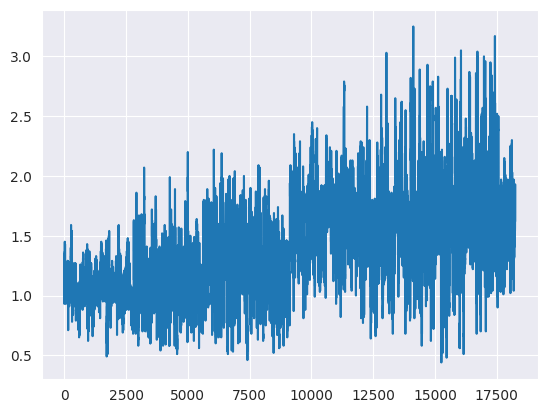

In [140]:
plt.plot(avocado['averageprice'])

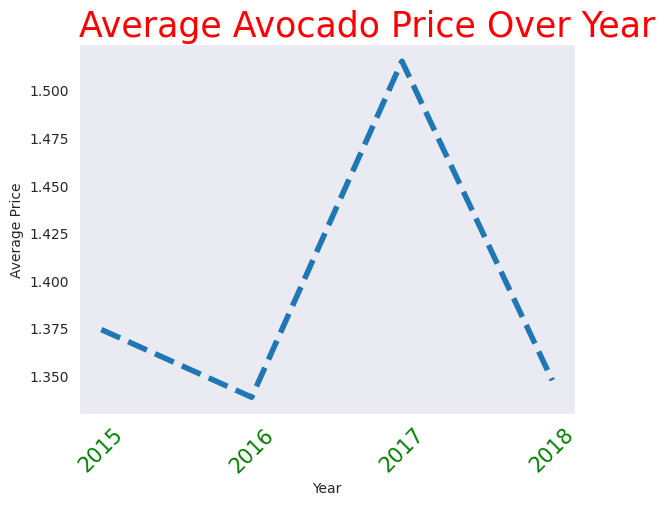

In [141]:
avg_price_per_year = avocado.groupby('year')['averageprice'].mean()
plt.plot(avg_price_per_year.index, avg_price_per_year.values, linewidth=4, linestyle='--')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Avocado Price Over Year', fontsize=25, loc='left', color='red')
plt.xticks(avg_price_per_year.index, rotation=45, fontsize=15, color='green')
plt.show()

In [142]:
year = avocado['year'].unique()
plt.bar(avocado['year'], avocado['averageprice'])
plt.grid()
plt.xlabel('year')
plt.ylabel('Average Price')
plt.title('Average Avocado Price Over year', fontsize=25, loc='left', color='red')
plt.xticks(year, rotation=45, fontsize=15, color='green')
plt.show()

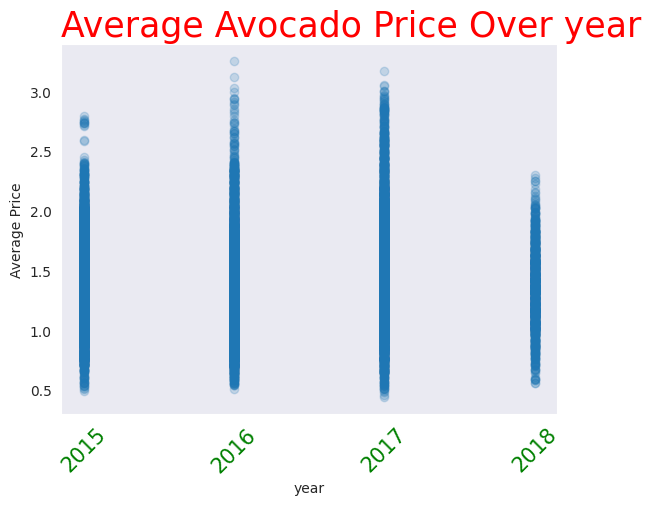

In [143]:
year = avocado['year'].unique()
plt.scatter(avocado['year'], avocado['averageprice'], alpha= 0.2)
plt.grid()
plt.xlabel('year')
plt.ylabel('Average Price')
plt.title('Average Avocado Price Over year', fontsize=25, loc='left', color='red')
plt.xticks(year, rotation=45, fontsize=15, color='green')
plt.show()

In [144]:
year = avocado['year'].unique()
plt.scatter(avocado['year'], avocado['averageprice'], alpha= 0.2 ,marker='+' )
plt.grid()
plt.xlabel('year')
plt.ylabel('Average Price')
plt.title('Average Avocado Price Over year', fontsize=25, loc='left', color='red')
plt.xticks(year, rotation=45, fontsize=15, color='green')
plt.show()

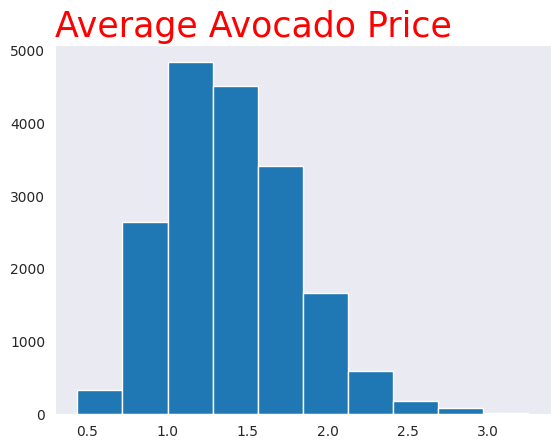

In [145]:
plt.hist(avocado['averageprice'])
plt.grid()
plt.title('Average Avocado Price', fontsize=25, loc='left', color='red')
plt.show()

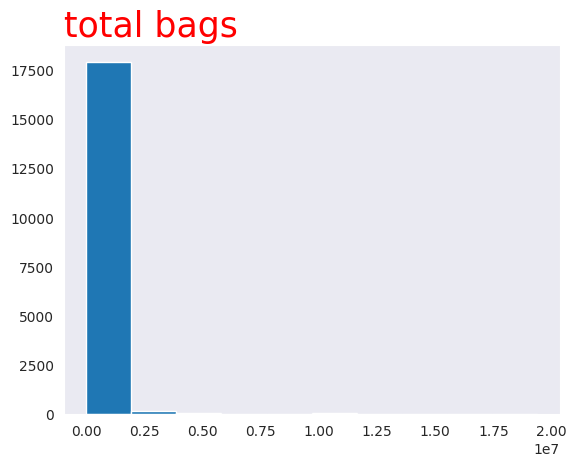

In [146]:
plt.hist(avocado['total bags'])
plt.grid()
plt.title('total bags', fontsize=25, loc='left', color='red')
plt.show()

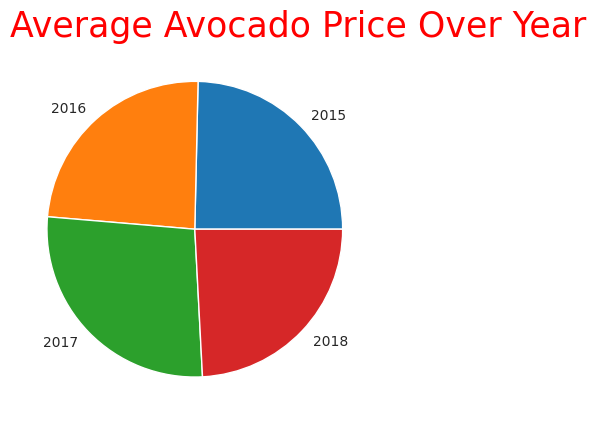

In [147]:
avg_price_per_year = avocado.groupby('year')['averageprice'].mean()
plt.pie(avg_price_per_year, labels=avg_price_per_year.index)
plt.title('Average Avocado Price Over Year', fontsize=25, loc='left', color='red')
plt.show()

# Seaborn

Text(0.5, 1.0, 'Distribution of averageprice')

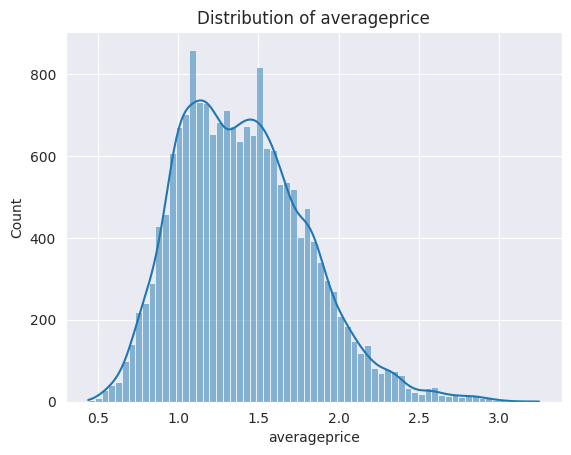

In [148]:
sns.histplot(avocado['averageprice'], kde=True)
plt.title('Distribution of averageprice')

<Axes: xlabel='averageprice', ylabel='Density'>

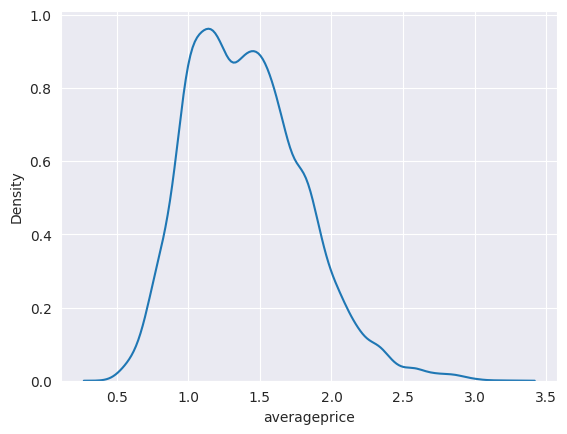

In [149]:
sns.kdeplot(avocado['averageprice'])

<Axes: xlabel='count', ylabel='type'>

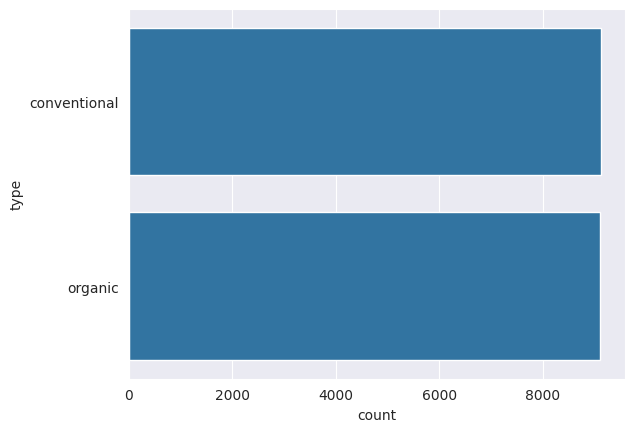

In [150]:
sns.countplot(avocado['type'])

In [151]:
sns.barplot(data= avocado , x= 'year' , y= 'averageprice')

<Axes: xlabel='year', ylabel='averageprice'>

<Axes: xlabel='type', ylabel='averageprice'>

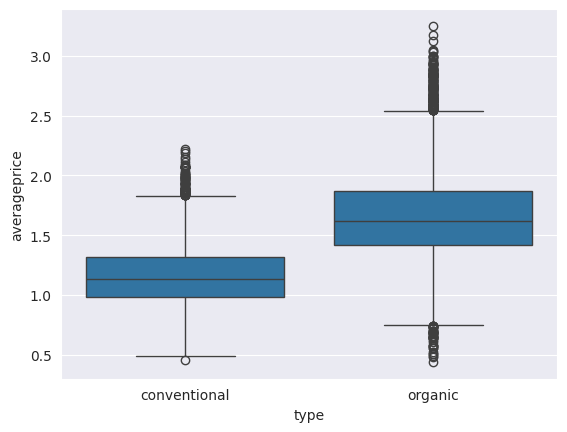

In [152]:
sns.boxplot(data = avocado , x= 'type' , y= 'averageprice')

In [153]:
sns.violinplot(data = avocado , x= 'type' , y= 'averageprice')

<Axes: xlabel='type', ylabel='averageprice'>

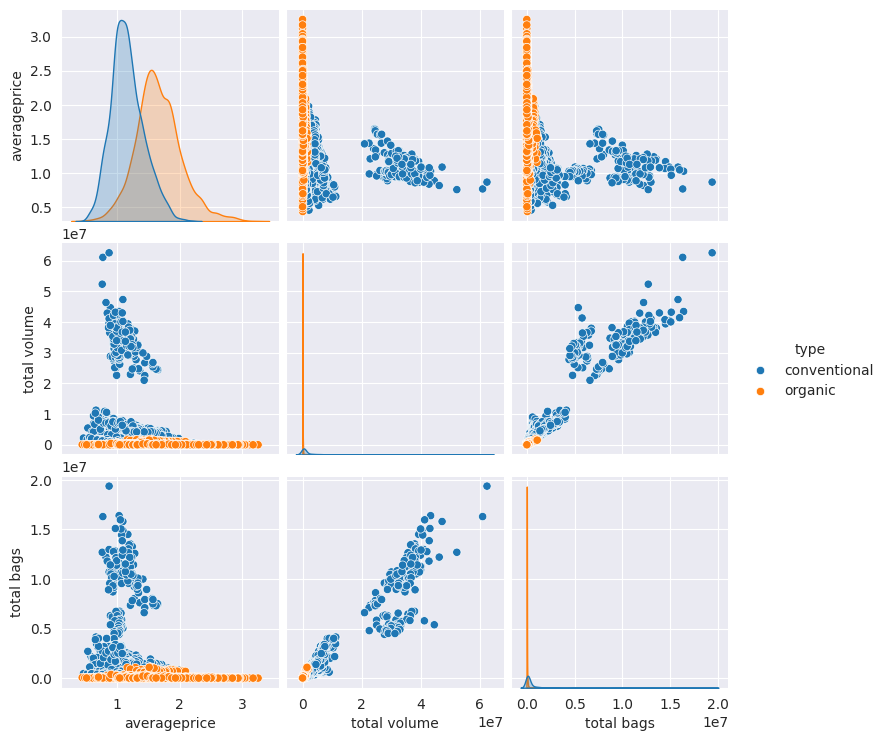

In [154]:
sns.pairplot(data = avocado , hue= 'type', vars=['averageprice', 'total volume', 'total bags'])

In [155]:
sns.jointplot(data = avocado , x = 'total bags' , y = 'total volume')

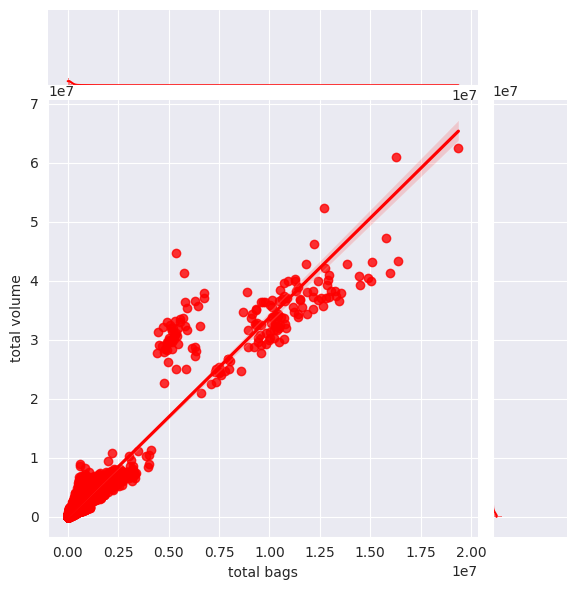

In [156]:
sns.set_style('darkgrid')
sns.jointplot(data = avocado , x = 'total bags' , y = 'total volume' , kind = 'reg',color = 'red')

In [157]:
sns.heatmap(avocado.select_dtypes(exclude='object').corr(),cmap = sns.color_palette("mako", as_cmap=True))

<Axes: >

In [158]:
selected_cols = avocado[['averageprice', 'total volume', 'total bags']]
corr_matrix = selected_cols.corr()
sns.heatmap(corr_matrix, cmap=sns.color_palette("mako", as_cmap=True), annot=True)

<Axes: >

In [159]:
g = sns.FacetGrid(avocado, col='year')
g.map(sns.histplot, 'total bags')

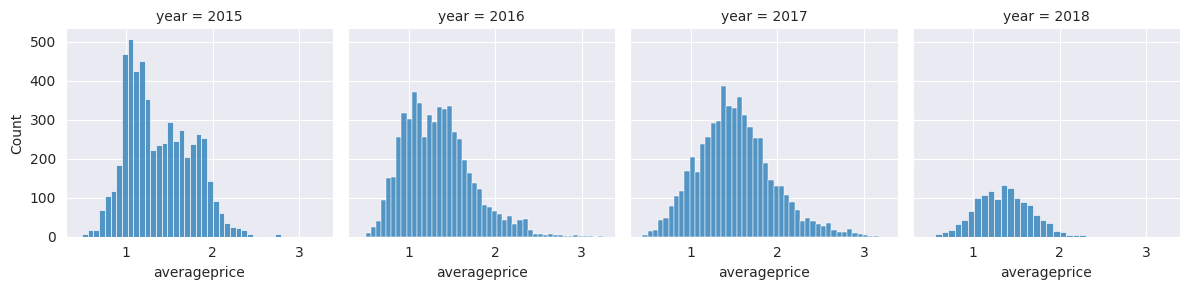

In [160]:
g = sns.FacetGrid(avocado, col='year')
g.map(sns.histplot, 'averageprice')